Перед началом работы демки, нужно создать файл с обученными векторайзером (BigramUnprocessedVectorizer.pkl) и классификатором (DefaultLogisticBigramUnprocessedTextSentiment.pkl). Для этого, как в лекции, загружаем обучающую выборку с отзывами на фильмы и обучаем на ней модель.

In [1]:
from nltk.corpus import movie_reviews
 
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

In [2]:
negfeats = [" ".join(movie_reviews.words(fileids=[f])) for f in negids]
posfeats = [" ".join(movie_reviews.words(fileids=[f])) for f in posids]

texts = negfeats + posfeats
labels = [0] * len(negfeats) + [1] * len(posfeats)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
vect = TfidfVectorizer(ngram_range=(2,2))
X_train = vect.fit_transform(texts)

In [5]:
clf = LogisticRegression()
clf.fit(X_train, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Теперь выгружаем обученную модель в файлы

In [6]:
from sklearn.externals import joblib

In [7]:
joblib.dump(vect, 'BigramUnprocessedVectorizer.pkl')
joblib.dump(clf, 'DefaultLogisticBigramUnprocessedTextSentiment.pkl')

['DefaultLogisticBigramUnprocessedTextSentiment.pkl']

Теперь создаём файл demo.py с исполняемым скриптом (взяв за основу одноимённый файл из архива в задании) со следующим кодом:

In [11]:
__author__ = 'xead'
from sentiment_classifier import SentimentClassifier
from codecs import open
import time
from flask import Flask, render_template, request
app = Flask(__name__)

print "Preparing classifier"
start_time = time.time()
classifier = SentimentClassifier()
print "Classifier is ready"
print time.time() - start_time, "seconds"

@app.route("/", methods=["POST", "GET"])
def index_page(text="", prediction_message=""):
    if request.method == "POST":
        text = request.form["text"]
        logfile = open("ydf_demo_logs.txt", "a", "utf-8")
	print text
	print >> logfile, "<response>"
	print >> logfile, text
        prediction_message = classifier.get_prediction_message(text)
        print prediction_message
	print >> logfile, prediction_message
	print >> logfile, "</response>"
	logfile.close()
	
    return render_template('hello.html', text=text, prediction_message=prediction_message)


if __name__ == "__main__":
    app.run()

Preparing classifier


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Classifier is ready
10.2349998951 seconds


Для работы, складываем следующие компоненты демки в одну папку:
- созданный файл demo.py
- файл sentiment_classifier.py из скачанного архива, без изменений
- папку templates с файлом hello.html из скачанного архива (можно подправить слово "банк" на "фильм")
- созданные файлы BigramUnprocessedVectorizer.pkl и DefaultLogisticBigramUnprocessedTextSentiment.pkl

Для запуска демки нужно запустить скрипт demo.py в интерпретаторе Питона. Для Windows, например, можно через .bat файл следующего содержания:
C:\ProgramData\Anaconda2\python.exe C:\ProgramData\Anaconda2\Scripts\demo.py

Для тестирования оценки вводимых фраз открываем браузер и вводим адрес: http://127.0.0.1:5000/

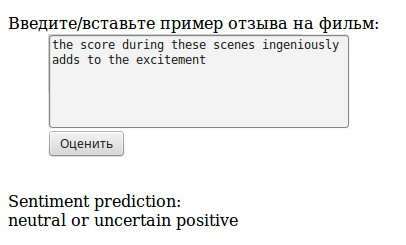

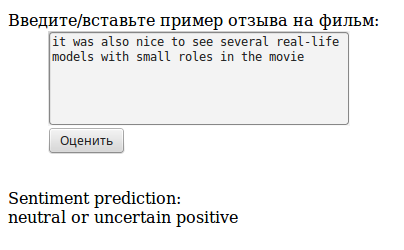

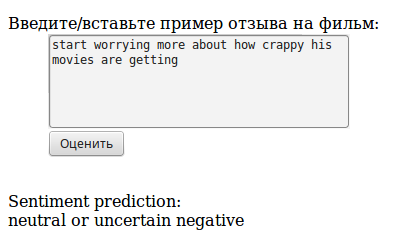